## Ecommerce Regression model

- In this I am using Ecommerce Data set from Kaggle.
- In this project we will create a simple regression model based on multiple variables. Apart from creating a model, we will also do EDA and some data vizulization for data understanding.
- Steps taken :
    1) Did EDA to understand the data.
    2) Data vizulization for understanding the data
    3) checked the coorelation between the variables.
    4) using sklearn created Test and Train data set.
    5) Trained the training data set.
    6) After Training, checked the coefficient of each variable to check which variable will influence the most on model outcome.
    7) Executing the model using the Test data set.
    8) Took various steps to evaluate the model out put.
    9) Exported the model output by merging with main data set to check the outcome.
- Please review the output of the model file name "Ecommerce_Predicted_Spending"


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)


In [2]:
df_main =  pd.read_csv("Ecommerce Customers")
df_main.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
### Rename the columns
df_main.rename(columns={"Avg. Session Length": "AverageSession",
                       "Time on App":"TimeOnApp",
                       "Time on Website":"TimeOnWebsite",
                       "Length of Membership":"MembershipTenure",
                       "Yearly Amount Spent":"TotalAnnualSpent"},inplace=True)

In [4]:
## checking if any Nan Vales
df_main.isnull().sum()

Email               0
Address             0
Avatar              0
AverageSession      0
TimeOnApp           0
TimeOnWebsite       0
MembershipTenure    0
TotalAnnualSpent    0
dtype: int64

In [5]:
df_main.describe()

,AverageSession,TimeOnApp,TimeOnWebsite,MembershipTenure,TotalAnnualSpent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
### checking Datatype
df_main.dtypes

Email                object
Address              object
Avatar               object
AverageSession      float64
TimeOnApp           float64
TimeOnWebsite       float64
MembershipTenure    float64
TotalAnnualSpent    float64
dtype: object

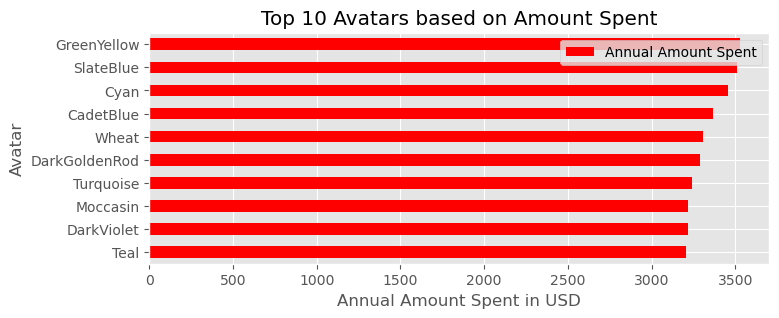

In [7]:
### checking customers top 5 customers with highest annual spent
top_10_cust = df_main.groupby(["Avatar"])["TotalAnnualSpent"].agg('sum') \
.reset_index(name = 'Annual Amount Spent')\
.sort_values(by = ["Annual Amount Spent"],ascending = False).head(10) 
top_10_cust_bar = top_10_cust \
.sort_values("Annual Amount Spent") \
.plot(kind = 'barh',x = "Avatar",y="Annual Amount Spent",figsize = (8,3),color = "red",
      title = "Top 10 Avatars based on Amount Spent")
top_10_cust_bar.set_xlabel("Annual Amount Spent in USD")
top_10_cust_bar.set_ylabel("Avatar")
plt.show()


In [8]:
### Showing Top 5 customers in DataFrame
top_10_cust

,Avatar,Annual Amount Spent
52,GreenYellow,3526.164138
122,SlateBlue,3507.296944
20,Cyan,3456.129189
13,CadetBlue,3364.704513
133,Wheat,3307.629694
23,DarkGoldenRod,3290.798581
131,Turquoise,3241.501052
92,Moccasin,3217.741065
37,DarkViolet,3214.234957
128,Teal,3206.776769


# Evaluation Top 10 Avatars based on Length of Membership

In [9]:
top_members = df_main.groupby("Avatar")["MembershipTenure"].agg('sum') \
.reset_index(name = "MembershipTenure") \
.nlargest(n=10,columns = ["MembershipTenure"])
top_members

,Avatar,MembershipTenure
52,GreenYellow,25.824820
20,Cyan,25.229431
122,SlateBlue,25.130944
37,DarkViolet,24.996961
133,Wheat,24.212736
38,DeepPink,23.326479
23,DarkGoldenRod,23.048821
92,Moccasin,22.535178
131,Turquoise,22.488107
13,CadetBlue,22.433551


- plot the above data in graph for Data Vizulization

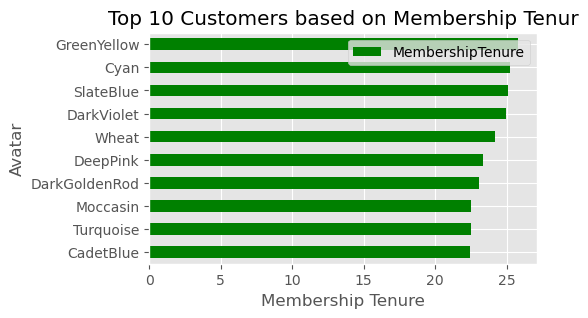

In [10]:
 top_mem_bar = top_members.sort_values(by = ["MembershipTenure"]) \
    .plot(kind="barh",x = "Avatar",y = "MembershipTenure",color = "green",title = "Top 10 Customers based on Membership Tenur",
         figsize = (5,3))
top_mem_bar.set_xlabel("Membership Tenure")
top_mem_bar.set_ylabel("Avatar")
plt.show()

- From the above 2 bar graphs we can see that Avatar "GreenYellow" is top in both the plots, this gives us slight indication that if a customer is a member for longer term, he/she can spend more annually.

# Checking corelation between various variables

In [11]:
df_corr = df_main[["AverageSession","TimeOnApp","TimeOnWebsite","MembershipTenure","TotalAnnualSpent"]].corr()
df_corr

,AverageSession,TimeOnApp,TimeOnWebsite,MembershipTenure,TotalAnnualSpent
AverageSession,1.000000,-0.027826,-0.034987,0.060247,0.355088
TimeOnApp,-0.027826,1.000000,0.082388,0.029143,0.499328
TimeOnWebsite,-0.034987,0.082388,1.000000,-0.047582,-0.002641
MembershipTenure,0.060247,0.029143,-0.047582,1.000000,0.809084
TotalAnnualSpent,0.355088,0.499328,-0.002641,0.809084,1.000000


- The above table shows us below :
    1) TotalAnnualSpent is highly correlated with MembershipTenure,followed by TimeOnApp and AverageSession

## Seeing the above correlation on heatmap

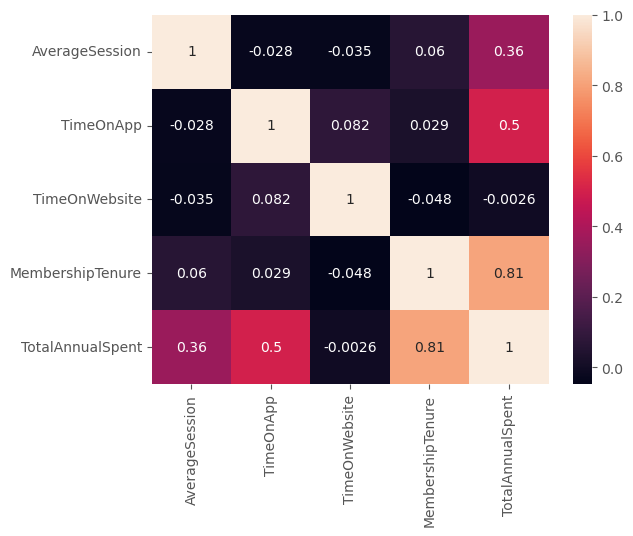

In [12]:
sns.heatmap(df_corr,annot= True)
plt.show()

# Further checking the coorelation between the 2 highly related variables

C:\Users\ADCB\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


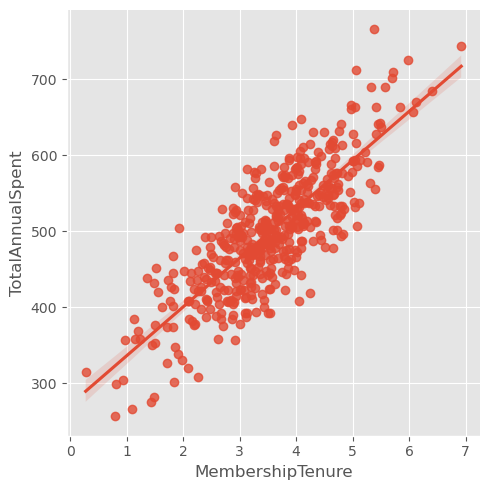

In [13]:
sns.lmplot(x = "MembershipTenure",
          y = "TotalAnnualSpent",
          data = df_main)

- The above plot shows that there is a +ve correlation between the 2 variables.

# Training and Testing set split

In [14]:
from sklearn.model_selection import train_test_split

- independent variables will be "MembershipTenure","TimeOnWebsite","AverageSession","TimeOnApp" as these 4 are very closley related to the target variable
i.e "TotalAnnualSpent"


In [15]:
X = df_main[["MembershipTenure","TimeOnWebsite","AverageSession","TimeOnApp"]]
y = df_main["TotalAnnualSpent"]

- Creating Test and Train data set

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Training the model

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lm = LinearRegression()

In [19]:
lm.fit(X_train,y_train)

LinearRegression()

In [20]:
lm.coef_

array([61.67473243,  0.45914788, 25.72425621, 38.59713548])

In [21]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=["coef_val"])
print(cdf)

                   coef_val
MembershipTenure  61.674732
TimeOnWebsite      0.459148
AverageSession    25.724256
TimeOnApp         38.597135


- The above equation shows us how important or how much influence the independent variables plays for the Target variable, in this case MembershipTenure  has more influence on the Target variable when compared to other variables

In [22]:
predictions = lm.predict(X_test)

In [23]:
predictions
### below is the predicted value i.e y axis

array([403.66993069, 542.57756289, 427.06591658, 502.02460425,
       410.12143559, 569.93442508, 531.93431341, 506.29650969,
       408.71870658, 473.97737105, 441.46912726, 425.33703059,
       425.1297229 , 527.61676714, 431.45684016, 424.0769184 ,
       575.76543296, 484.89856554, 458.35936863, 481.96502182,
       502.32441491, 513.63783554, 507.58877002, 646.57464283,
       450.24372141, 496.27043415, 556.40457807, 554.95630839,
       399.64237199, 325.84623136, 532.89783259, 478.12238702,
       501.05701845, 305.97335848, 505.77244448, 483.79591969,
       518.8331528 , 438.18241857, 456.71094234, 471.04609461,
       494.44008972, 445.31155755, 508.78802753, 501.04594193,
       488.83499673, 535.38079541, 595.20129802, 514.04714872,
       280.76758312, 433.10112367, 421.70823427, 481.23640152,
       584.71372272, 608.7748096 , 563.98513427, 494.72804869,
       394.52133407, 456.4197529 , 573.08767515, 499.6984241 ,
       512.83277025, 392.12434043, 480.05057697, 481.54

- Plotting the graph to check the prdiction value against the actual values, making sure that the predicted values makes sense when compared to actual values.

Text(0.5, 1.0, 'Evaluation of the Model')

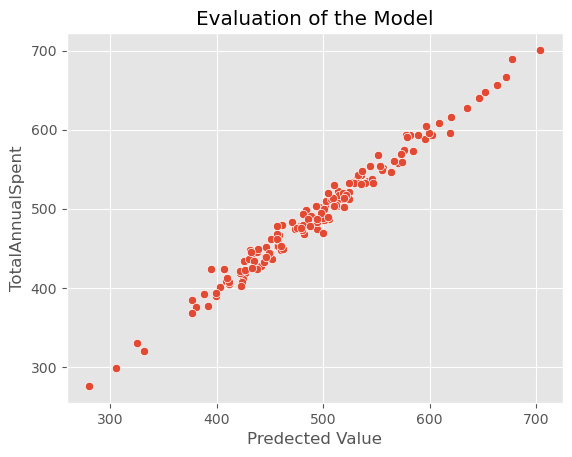

In [24]:
sns.scatterplot(x = predictions,y = y_test)
plt.xlabel("Predected Value")
plt.title("Evaluation of the Model")

- The above chart shows that the distribution of data seems good and has shows preety coorelation

In [25]:
## Another evaluating method using metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
import math


- Mean aboslute Error will give us a value i.e difference between the predectied line and the Actual value.
- Mean absolute squared error will give us the squared error between the predicted and the Actual value.

In [26]:
print("Mean Absolute Error :",mean_absolute_error(y_test,predictions))
print("Mean Squared Error :",mean_squared_error(y_test,predictions))
print("Root Mean Squared Error :",math.sqrt(mean_squared_error(y_test,predictions)))


Mean Absolute Error : 8.426091641432112
Mean Squared Error : 103.9155413650334
Root Mean Squared Error : 10.193897260863158


In [27]:
# Checking on residual, to see distribution

In [28]:
residuals = y_test - predictions

- if you make a prediction making linear model, the residuals are supposed to be random, if they are not random, then it means that the model is biased to something. Hence if the residuals are random, then its not an issue as this is a normal behaviour.

C:\Users\ADCB\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


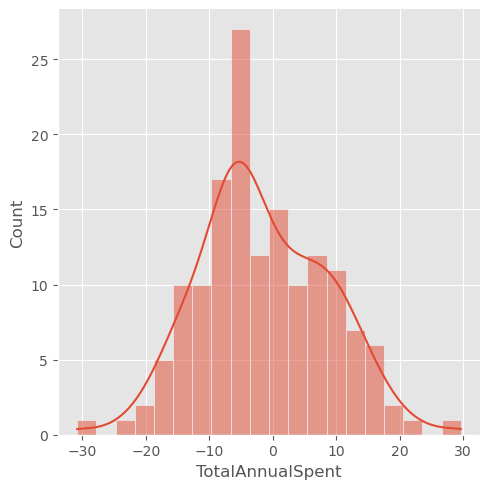

In [29]:
sns.displot(residuals,bins = 20,kde = True)

- Another way of checking the residual normal distribution is using probability plot.

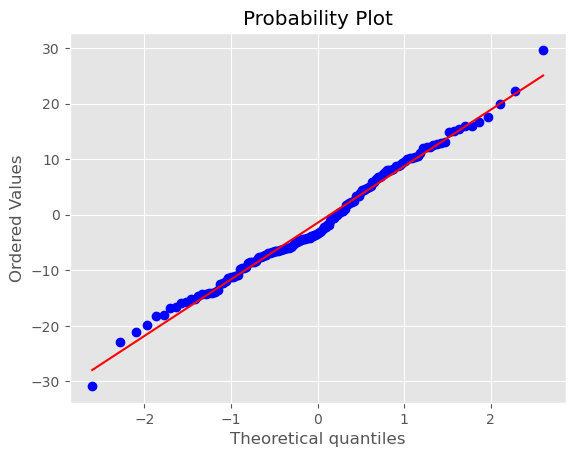

In [30]:
import pylab
import scipy.stats as st 
st.probplot(residuals,dist = 'norm',plot = pylab)
pylab.show()

# Now getting the ouptput of the Predicted value

In [31]:
pred_output = lm.predict(X)

In [32]:
df_main["PredictedValue"] = pred_output

In [33]:
df_main.head(2)

,Email,Address,Avatar,AverageSession,TimeOnApp,TimeOnWebsite,MembershipTenure,TotalAnnualSpent,PredictedValue
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,595.201298
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,380.834846


In [34]:
# Export the DataFrame to an Excel file
df_main.to_csv('Ecommerce_Predicted_Spending.csv', index=False)